In [131]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import math
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [61]:
df = pd.read_csv('/kaggle/input/diabetesdataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
df.shape

(768, 9)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
df.apply(pd.isnull).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
df.duplicated().sum()

0

In [66]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

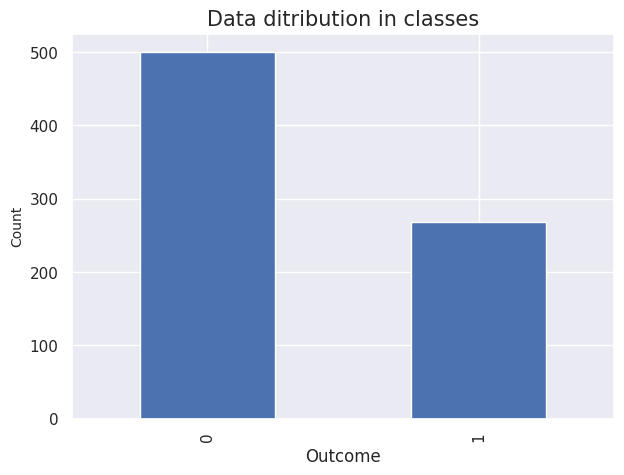

In [68]:
df['Outcome'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data ditribution in classes', fontsize = 15)
plt.ylabel('Count', fontsize = 10)
plt.show()

In [69]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

In [70]:
for i in cols:
    print('The number of zeros in', i, 'column is:', df[df[i] == 0].shape[0])

The number of zeros in Glucose column is: 5
The number of zeros in BloodPressure column is: 35
The number of zeros in SkinThickness column is: 227
The number of zeros in Insulin column is: 374
The number of zeros in BMI column is: 11
The number of zeros in Age column is: 0


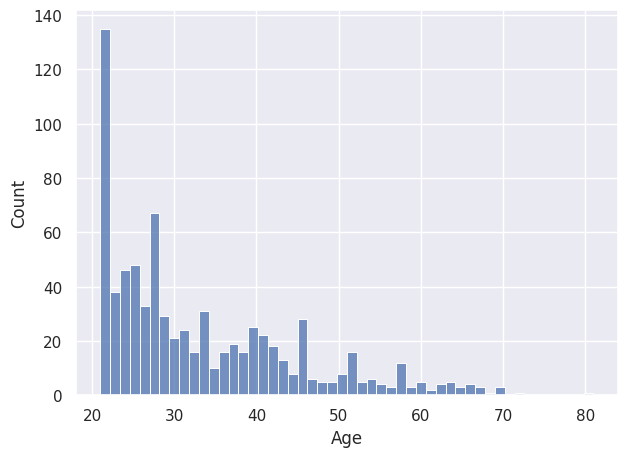

In [71]:
plt.figure(figsize = (7, 5))
sns.histplot(df['Age'], bins = 50)
plt.show()

In [72]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [73]:
df_20to39 = df[df['Age'] > 20]
df_20to39 = df_20to39[df_20to39['Age'] <= 39]

In [74]:
df_20to39.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,2.823529,117.146168,66.618538,21.388592,82.458111,31.708556,0.473701,27.194296,0.285205
std,2.638157,30.656682,19.576880,15.226228,110.342755,8.171003,0.335539,5.212592,0.451915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,96.000000,60.000000,8.000000,0.000000,26.600000,0.247000,23.000000,0.000000
50%,2.000000,112.000000,70.000000,23.000000,52.000000,31.600000,0.375000,26.000000,0.000000
75%,4.000000,133.000000,78.000000,32.000000,128.000000,36.400000,0.619000,31.000000,1.000000
max,14.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,39.000000,1.000000


In [75]:
df_40to59 = df[df['Age'] > 39]
df_40to59 = df_40to59[df_40to59['Age'] <= 59]

In [76]:
df_40to59.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,6.902857,129.737143,75.851429,19.097143,78.720000,33.549714,0.470971,46.845714,0.565714
std,3.619351,33.584677,16.863573,16.670462,129.913439,6.676583,0.336973,5.573353,0.497085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,40.000000,0.000000
25%,5.000000,106.000000,70.000000,0.000000,0.000000,29.600000,0.237500,42.000000,0.000000
50%,7.000000,126.000000,78.000000,24.000000,0.000000,33.600000,0.349000,45.000000,1.000000
75%,9.000000,154.000000,84.000000,32.000000,133.500000,37.600000,0.642000,51.000000,1.000000
max,17.000000,197.000000,114.000000,54.000000,846.000000,52.300000,1.781000,59.000000,1.000000


In [77]:
df_60to81 = df[df['Age'] > 59]

In [78]:
df_60to81.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,5.03125,138.250000,75.812500,13.468750,39.093750,28.456250,0.444844,64.843750,0.281250
std,2.92359,31.260611,18.295844,21.722568,109.911213,7.322169,0.210096,4.385529,0.456803
min,0.00000,57.000000,0.000000,0.000000,0.000000,0.000000,0.164000,60.000000,0.000000
25%,3.75000,119.750000,71.500000,0.000000,0.000000,26.050000,0.252250,62.000000,0.000000
50%,5.00000,135.500000,78.000000,0.000000,0.000000,28.400000,0.439500,64.500000,0.000000
75%,7.00000,158.000000,84.500000,27.250000,0.000000,33.100000,0.594000,67.000000,1.000000
max,12.00000,197.000000,108.000000,99.000000,495.000000,39.200000,0.832000,81.000000,1.000000


In [79]:
cols2 = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [80]:
for i in cols2:
    df_20to39[i] = df_20to39[i].replace(0, np.nan)
    df_40to59[i] = df_40to59[i].replace(0, np.nan)
    df_60to81[i] = df_60to81[i].replace(0, np.nan)

In [81]:
df_20to39.shape

(561, 9)

In [82]:
df_20to39.isnull().sum()

Pregnancies                   0
Glucose                       4
BloodPressure                29
SkinThickness               140
Insulin                     243
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [83]:
df_40to59.shape

(175, 9)

In [84]:
df_40to59.isnull().sum()

Pregnancies                   0
Glucose                       1
BloodPressure                 5
SkinThickness                68
Insulin                     104
BMI                           1
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [85]:
df_60to81.shape

(32, 9)

In [86]:
df_60to81.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                1
SkinThickness               19
Insulin                     27
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [87]:
cols2

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [88]:
for i in cols2:
    df_20to39[i] = df_20to39[i].fillna(df_20to39[i].median())

In [89]:
df_20to39.apply(pd.isnull).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [90]:
df_20to39.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,2.823529,117.951872,70.237077,28.625668,132.270945,32.215508,0.473701,27.194296,0.285205
std,2.638157,29.004855,11.870241,8.915415,84.846130,7.095722,0.335539,5.212592,0.451915
min,0.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,62.000000,23.000000,105.000000,27.200000,0.247000,23.000000,0.000000
50%,2.000000,113.000000,70.000000,29.000000,115.000000,31.600000,0.375000,26.000000,0.000000
75%,4.000000,133.000000,78.000000,32.000000,128.000000,36.400000,0.619000,31.000000,1.000000
max,14.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,39.000000,1.000000


In [91]:
for i in cols2:
    df_40to59[i] = df_40to59[i].fillna(df_40to59[i].median())

In [92]:
df_40to59.apply(pd.isnull).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [93]:
df_40to59.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,6.902857,130.460000,78.080000,30.754286,170.834286,33.742000,0.470971,46.845714,0.565714
std,3.619351,32.105002,10.685924,6.720373,90.097973,6.170151,0.336973,5.573353,0.497085
min,0.000000,57.000000,52.000000,7.000000,22.000000,20.800000,0.085000,40.000000,0.000000
25%,5.000000,106.000000,72.000000,28.500000,155.000000,29.650000,0.237500,42.000000,0.000000
50%,7.000000,126.500000,78.000000,30.000000,155.000000,33.650000,0.349000,45.000000,1.000000
75%,9.000000,154.000000,84.000000,32.000000,155.000000,37.600000,0.642000,51.000000,1.000000
max,17.000000,197.000000,114.000000,54.000000,846.000000,52.300000,1.781000,59.000000,1.000000


In [94]:
cols2_2 = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [95]:
for i in cols2_2:
    df_60to81[i] = df_60to81[i].fillna(df_60to81[i].median())

In [96]:
df_60to81.apply(pd.isnull).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [97]:
df_60to81.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,5.03125,138.250000,78.250000,31.875000,199.406250,29.356250,0.444844,64.843750,0.281250
std,2.92359,31.260611,11.973088,14.118736,63.675011,5.163391,0.210096,4.385529,0.456803
min,0.00000,57.000000,50.000000,7.000000,60.000000,19.600000,0.164000,60.000000,0.000000
25%,3.75000,119.750000,73.500000,31.000000,190.000000,26.400000,0.252250,62.000000,0.000000
50%,5.00000,135.500000,78.000000,31.000000,190.000000,28.800000,0.439500,64.500000,0.000000
75%,7.00000,158.000000,84.500000,31.000000,190.000000,33.100000,0.594000,67.000000,1.000000
max,12.00000,197.000000,108.000000,99.000000,495.000000,39.200000,0.832000,81.000000,1.000000


In [98]:
dataset = pd.concat([df_20to39, df_40to59, df_60to81])

In [99]:
dataset.shape

(768, 9)

In [100]:
dataset.apply(pd.isnull).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [101]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.647786,72.358073,29.246094,143.855469,32.444206,0.471876,33.240885,0.348958
std,3.369578,30.442884,12.115402,8.799112,87.489504,6.877169,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,115.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,115.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,115.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,115.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,115.0,25.6,0.201,30,0


In [103]:
X = dataset.iloc[:, 0: 8]
y = dataset.iloc[:, 8]

In [104]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1,85.0,66.0,29.0,115.0,26.6,0.351,31
2,8,183.0,64.0,29.0,115.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
5,5,116.0,74.0,29.0,115.0,25.6,0.201,30


In [105]:
y

1      0
2      1
3      0
4      1
5      0
      ..
666    1
674    0
684    0
759    1
763    0
Name: Outcome, Length: 768, dtype: int64

In [106]:
X, y = shuffle(X, y)

In [107]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
542,10,90.0,85.0,32.0,155.0,34.9,0.825,56
148,5,147.0,78.0,31.0,190.0,33.7,0.218,65
720,4,83.0,86.0,19.0,115.0,29.3,0.317,34
173,1,79.0,60.0,42.0,48.0,43.5,0.678,23
214,9,112.0,82.0,32.0,175.0,34.2,0.260,36


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle = True,
                                                   stratify = y)

In [109]:
print('The number of data in training set is:', X_train.shape[0])
print('The number of data in test set is:', X_test.shape[0])

The number of data in training set is: 614
The number of data in test set is: 154


In [110]:
scaler = StandardScaler()

In [111]:
X_train_scaled = scaler.fit_transform(X_train)

In [112]:
X_test_scaled = scaler.transform(X_test)

In [113]:
print(math.sqrt(len(y_test)))

12.409673645990857


In [114]:
k = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [115]:
accuracy = []
for i in k:
    km = KNeighborsClassifier(n_neighbors = i, p = 2, metric = 'euclidean')
    cvs = cross_val_score(km, X_train_scaled, y_train, cv = 5)
    accuracy.append(cvs.mean())

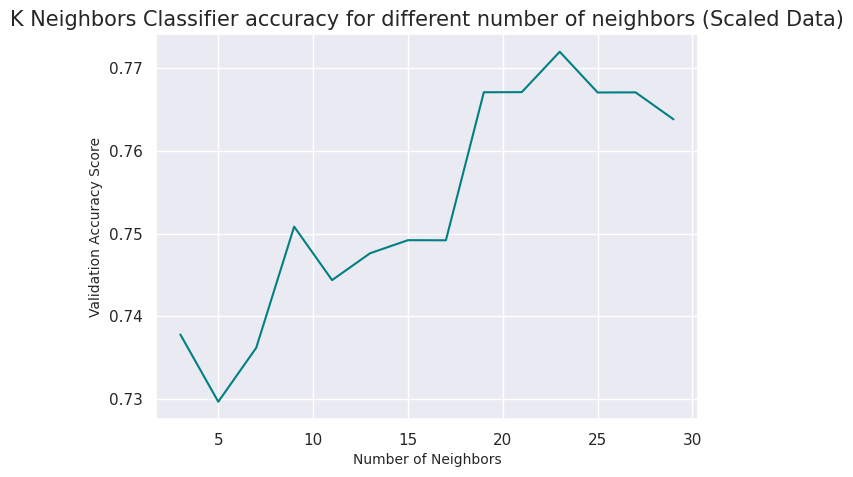

In [116]:
plt.figure(figsize = (7, 5))
plt.plot(k, accuracy, color = 'teal')
plt.title('K Neighbors Classifier accuracy for different number of neighbors (Scaled Data)', fontsize = 15)
plt.xlabel('Number of Neighbors', fontsize = 10)
plt.ylabel('Validation Accuracy Score', fontsize = 10)
plt.show()

In [117]:
accuracy2 = []
for i in k:
    km2 = KNeighborsClassifier(n_neighbors = i, p = 2, metric = 'euclidean')
    cvs2 = cross_val_score(km2, X_train, y_train, cv = 5)
    accuracy2.append(cvs2.mean())

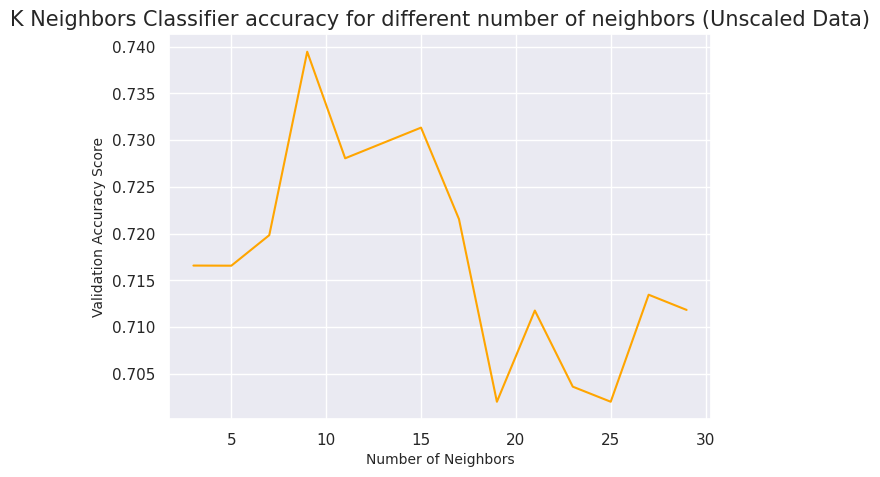

In [119]:
plt.figure(figsize = (7, 5))
plt.plot(k, accuracy2, color = 'orange')
plt.title('K Neighbors Classifier accuracy for different number of neighbors (Unscaled Data)', fontsize = 15)
plt.xlabel('Number of Neighbors', fontsize = 10)
plt.ylabel('Validation Accuracy Score', fontsize = 10)
plt.show()

In [120]:
knn = KNeighborsClassifier(n_neighbors = 23, p = 2, metric = 'euclidean')

In [121]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

In [122]:
y_pred = knn.predict(X_test_scaled)

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       100
           1       0.73      0.69      0.70        54

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154



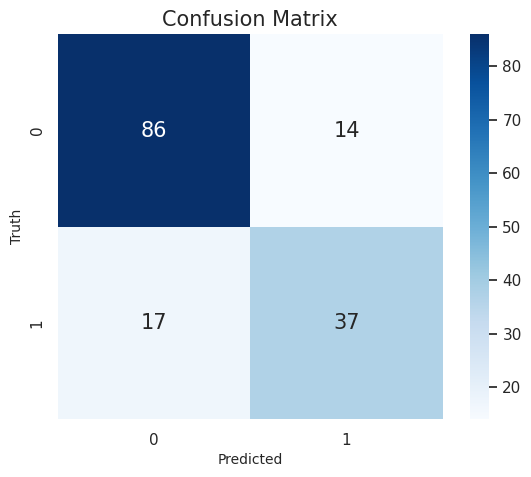

In [124]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [132]:
smote = SMOTE(sampling_strategy = 'not majority')

In [133]:
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

In [135]:
len(X_train_scaled)

800

In [137]:
X_test_scaled, y_test = smote.fit_resample(X_test_scaled, y_test)

In [138]:
len(X_test_scaled)

200

In [139]:
accuracy3 = []
for i in k:
    km3 = KNeighborsClassifier(n_neighbors = i, p = 2, metric = 'euclidean')
    cvs3 = cross_val_score(km3, X_train_scaled, y_train, cv = 5)
    accuracy3.append(cvs3.mean())

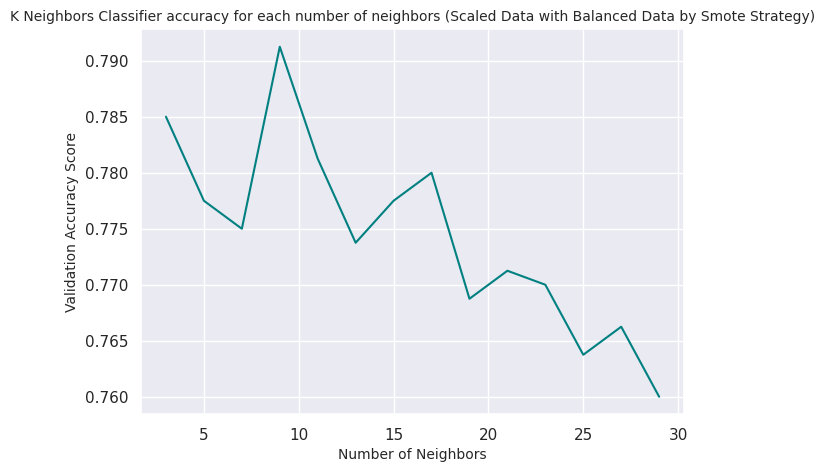

In [141]:
plt.figure(figsize = (7, 5))
plt.plot(k, accuracy3, color = 'teal')
plt.title('K Neighbors Classifier accuracy for each number of neighbors (Scaled Data with Balanced Data by Smote Strategy)', 
         fontsize = 10)
plt.xlabel('Number of Neighbors', fontsize = 10)
plt.ylabel('Validation Accuracy Score', fontsize = 10)
plt.show()

In [142]:
knn2 = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')

In [143]:
knn2.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [149]:
y_pred2 = knn2.predict(X_test_scaled)

In [152]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76       100
           1       0.73      0.88      0.80       100

    accuracy                           0.78       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.78      0.78       200



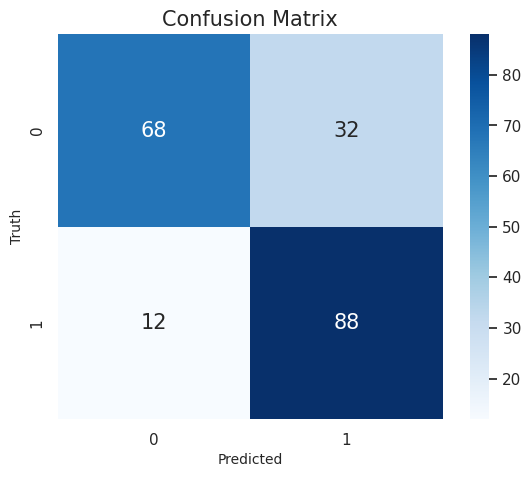

In [153]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()